In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuration for plotting and warnings
sns.set(context='notebook', font_scale=1.1, 
        style='ticks', rc={'figure.figsize': (8, 3), 'figure.facecolor': 'none', 'axes.facecolor': 'none'})
plt.set_loglevel('WARNING')
plt.rcParams.update({'lines.markeredgewidth': 1})
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'svg'

In [21]:
# Load dataframes
df_waymax = pd.read_csv('waymax.csv')
df_gpudrive = pd.read_csv('gpudrive_0505_after_fix.csv')

df_gpudrive['Sim'] = 'GPUDrive'
df_waymax['Sim'] = 'Waymax' 

In [39]:
df_gpudrive

,actual_num_agents,actual_num_roads,useful_num_agents,useful_num_roads,num_envs,Reset,Step,fps,afps,useful_afps,exec_mode,datasetInitOptions,Sim,Device
0,2048,48000,272,9568,16,1.843506,2.031111,492.341359,1.008315e+06,133916.849690,CUDA,PadN,GPUDrive,GPU v100
1,6400,150000,850,29900,50,3.844159,4.063735,246.079051,1.574906e+06,209167.192949,CUDA,PadN,GPUDrive,GPU v100
2,25600,600000,3400,119600,200,12.709087,13.311604,75.122427,1.923134e+06,255416.251641,CUDA,PadN,GPUDrive,GPU v100
3,38400,900000,5100,179400,300,18.999526,19.959227,50.102141,1.923922e+06,255520.919274,CUDA,PadN,GPUDrive,GPU v100


In [22]:
df_waymax

,Device,Reset,Step,num_envs,Sim
0,GPU v100,0.64,0.92,1,Waymax
1,GPU v100,0.81,2.86,16,Waymax


In [30]:
df_gpudrive = df_gpudrive.rename({'time_to_step': 'Step', 'time_to_reset': 'Reset'}, axis=1)
df_gpudrive['Device'] = 'GPU v100'
df_gpudrive['Step'] *= 1000
df_gpudrive['Reset'] *= 1000 

In [41]:
df_gpudrive_select = df_gpudrive[['Device', 'Reset', 'Step', 'num_envs', 'Sim']]
df_gpudrive_select

df_compare = pd.concat([df_waymax, df_gpudrive_select])

In [42]:
# Ensure the index is unique by resetting it if necessary
if not df_compare.index.is_unique:
    df_compare.reset_index(drop=True, inplace=True)

# Round values in 'Reset' and 'Step' columns to two decimal places
df_compare['Reset'] = df_compare['Reset'].round(2)
df_compare['Step'] = df_compare['Step'].round(2)

# Ensure column names are unique (adjust as needed if there are duplicates)
# This step is typically unnecessary unless your DataFrame creation process introduced duplicate names.

# Now apply the styling
def style_specific_values(val):
    color = 'darkblue' if val == 'GPUDrive' else 'orange'
    return f'color: {color}; font-size:1.3em;'

styled_df = df_compare.sort_values(by='num_envs').round(2)
styled_df = styled_df.style.applymap(style_specific_values, subset=['Sim'])
styled_df = styled_df.format({'Reset': "{:.2f}", 'Step': "{:.2f}"})

styled_df

,Device,Reset,Step,num_envs,Sim
0,GPU v100,0.64,0.92,1,Waymax
1,GPU v100,0.81,2.86,16,Waymax
2,GPU v100,1.84,2.03,16,GPUDrive
3,GPU v100,3.84,4.06,50,GPUDrive
4,GPU v100,12.71,13.31,200,GPUDrive
5,GPU v100,19.00,19.96,300,GPUDrive


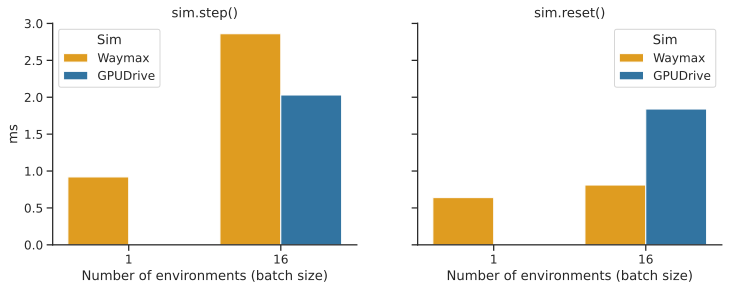

In [52]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))

sns.barplot(x='num_envs', y='Step', hue='Sim', palette=['orange', 'tab:blue'], data=df_compare[df_compare['num_envs'] < 20], ax=axs[0])
axs[0].set_title('sim.step()')
axs[0].set_ylabel('ms')
axs[0].set_xlabel('Number of environments (batch size)')

sns.barplot(x='num_envs', y='Reset', hue='Sim',  palette=['orange', 'tab:blue'], data=df_compare[df_compare['num_envs'] < 20], ax=axs[1])
axs[1].set_title('sim.reset()')
axs[1].set_ylabel('ms')
axs[1].set_xlabel('Number of environments (batch size)')

sns.despine()

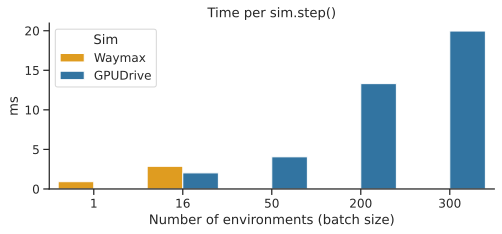

In [53]:
sns.barplot(x='num_envs', y='Step', palette=['orange', 'tab:blue'], hue='Sim', data=df_compare)
plt.title('Time per sim.step()')
plt.ylabel('ms')
plt.xlabel('Number of environments (batch size)')
sns.despine()

In [37]:
df_gpudrive

,actual_num_agents,actual_num_roads,useful_num_agents,useful_num_roads,num_envs,Reset,Step,fps,afps,useful_afps,exec_mode,datasetInitOptions,Sim,Device
0,2048,48000,272,9568,16,1.843506,2.031111,492.341359,1.008315e+06,133916.849690,CUDA,PadN,GPUDrive,GPU v100
1,6400,150000,850,29900,50,3.844159,4.063735,246.079051,1.574906e+06,209167.192949,CUDA,PadN,GPUDrive,GPU v100
2,25600,600000,3400,119600,200,12.709087,13.311604,75.122427,1.923134e+06,255416.251641,CUDA,PadN,GPUDrive,GPU v100
3,38400,900000,5100,179400,300,18.999526,19.959227,50.102141,1.923922e+06,255520.919274,CUDA,PadN,GPUDrive,GPU v100


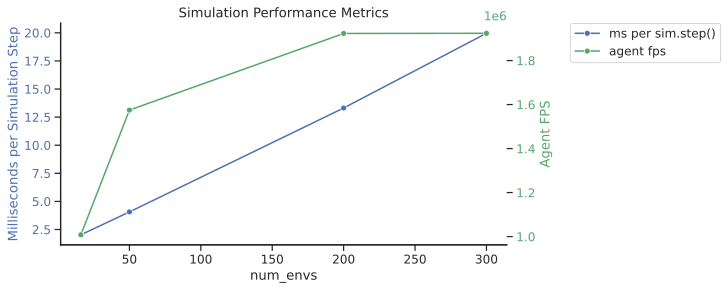

In [38]:
fig, ax1 = plt.subplots(figsize=(8, 4))

# Create the first line plot on ax1
sns.lineplot(x='num_envs', y='Step', data=df_gpudrive, label='ms per sim.step()', marker='o', ax=ax1, color='b', legend=False)
ax1.set_ylabel('Milliseconds per Simulation Step', color='b')  # Set label and tick colors
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for the second line plot
ax2 = ax1.twinx()
sns.lineplot(x='num_envs', y='afps', data=df_gpudrive, label='agent fps', marker='o', ax=ax2, color='g', legend=False)
ax2.set_ylabel('Agent FPS', color='g')  # Set label and tick colors
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Simulation Performance Metrics')
ax1.figure.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

# Remove top and right borders
sns.despine()

# Show plot
plt.show()